In [2]:
import numpy as np
import matplotlib.pyplot as pl
import audacity
import TransferFunctions as tf
import scipy.signal as sig

%matplotlib notebook

In [3]:
au = audacity.Aup('transfer/b-foot/2301_closing_2.aup')

In [4]:
rdata = []
maxl = 0
for ii in range(au.nchannels):
    rdata.append(au.get_channel_data(ii))
    print('Channel %d: %d samples'%(ii,len(rdata[-1])))
    maxl = max(maxl,len(rdata[-1]))

data = np.zeros((maxl,len(rdata)))
for ii,rd in enumerate(rdata):
    data[:len(rd),ii]=rd

Channel 0: 2653884 samples
Channel 1: 2659617 samples
Channel 2: 2659617 samples
Channel 3: 2659617 samples


<IPython.core.display.Javascript object>


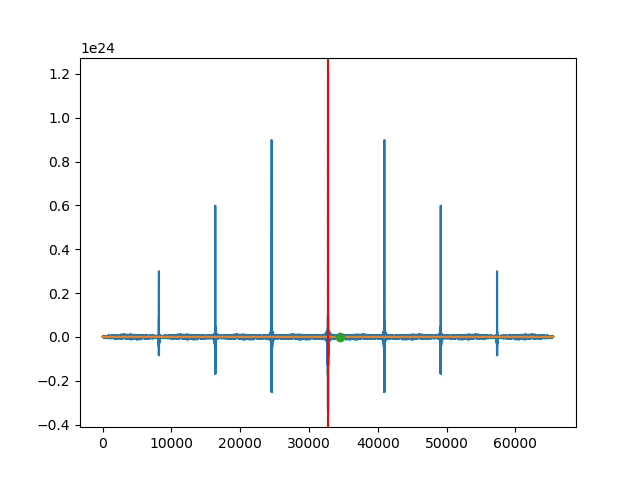

Delay: 1763 samples


In [5]:
# Check for delay between loudspeaker output (ch 0) and external mic inputs (ch 2)

fig,ax=pl.subplots(1)
delay=tf.determineDelay(data[:,0]/np.mean(data[:,0]),data[:,2]/np.mean(data[:,2]),maxdel=2**15,ax=ax)
print("Delay: %d samples"%delay)

Remove the delay by circular-shifting

In [6]:
data[:,0]=np.roll(data[:,0],delay)

Check that the shift was in the right direction

<IPython.core.display.Javascript object>


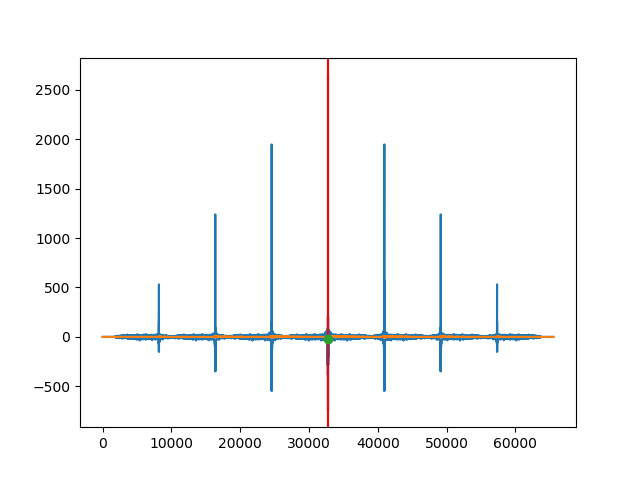

Delay: 0 samples


In [7]:
fig,ax=pl.subplots(1)
delay=tf.determineDelay(data[:,0],data[:,2],maxdel=2**15,ax=ax)
print("Delay: %d samples"%delay)